# HOMEWORK 03

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

## Task 1

**Check out the Jupyter notebook for Chapter 5 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb . Answer the question: what regularization techniques were mentioned in that Jupyter notebook? (5 points)**

The Jupyter notebook for Chapter 5 mentions the following regularization techniques:
- `L1 weight regularization`
- `L2 weight regularization`
- `Dropout regularization`

## Task 2

**The MNIST dataset has 60,000 training images and 10,000 test images. Each image is a 28x28 array, where each array element is between 0 and 255. The images have 10 labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.**

**We now create a new dataset of 30,000 training images, 5,000 test images and 5 labels (which are 0, 1, 2, 3, 4) as follows. First, randomly pair up the training images of label 0 with the training images of label 1, to get 6,000 such pairs. Then, for each pair (A,B) where A is an image of label 0 and B is an image of label 1, we create a new image of size 28x28, where each element's value is the "average" of the two corresponding pixel values in A and B. (So the new image is a "mixture" of the two original images.) This way we create 6,000 new "mixture" images for training. In a similar way, we create 1,000 new "mixture" images for testing. We give all these 6,000+1,000=7,000 new "mixture" images the new label 0. Then, in the same way, we create 6,000 new training images and 1,000 new test images by mixing the original images of label "2" and "3", and give them the new label 1; create 6,000 new training images and 1,000 new test images by mixing the original images of label "4" and "5", and give them the new label 2; create 6,000 new training images and 1,000 new test images by mixing the original images of label "6" and "7", and give them the new label 3; create 6,000 new training images and 1,000 new test images by mixing the original images of label "8" and "9", and give them the new label 4.**   

**Your task: submit your code that creates the above new dataset; then for each of the 5 new labels, randomly select 2 images of that label from your new dataset, and display them in your submitted Jupyter notebook. (5 points)**

Import packages

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from re import VERBOSE
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

Load MNIST dataset

In [2]:
# load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Create new images by averaging the pixel values of paired numbers

In [3]:
# number of labels
nums = range(10)

# find indices for the labels of each number
train_labels_idx = [] # list of indices for each training label
test_labels_idx = [] # list of indices for each testing label
for ii in nums:
  train_labels_idx.append(np.where(train_labels==ii)[0])
  test_labels_idx.append(np.where(test_labels==ii)[0])

# choose specified (6000 or 1000) elements from each label randomly
train_labels_idx_rand = [] # list of randomized training label indices
test_labels_idx_rand = [] # list of randomized testing label indices
for jj in nums:
  train_labels_idx_rand.append(np.random.choice(train_labels_idx[jj],6000))
  test_labels_idx_rand.append(np.random.choice(test_labels_idx[jj],1000))

# average values of images in pairs
train_images_list = [] # list of new (mixed) training images
test_images_list = [] # list of new (mixed) testing images
for kk in nums[::2]:
  train_images_list.append(train_images[train_labels_idx_rand[kk]]
                           +train_images[train_labels_idx_rand[kk+1]]/2)
  test_images_list.append(test_images[test_labels_idx_rand[kk]]
                          +test_images[test_labels_idx_rand[kk+1]]/2)

# concatenate arrays to create the new training and testing images
train_images_new = np.vstack(train_images_list)
test_images_new = np.vstack(test_images_list)

Create labels for the new images

In [4]:
# create lists of new labels
train_labels_list = [] # list of arrays containing new training labels
test_labels_list = [] # list of arrays containing new testing labels
for ii in range(5):
  train_labels_list.append(np.full((6000,),ii))
  test_labels_list.append(np.full((1000,),ii))

# concatenate arrays to create new training and testing labels
train_labels_new = np.hstack(train_labels_list)
test_labels_new = np.hstack(test_labels_list)

Shuffle new images and labels to create a new dataset that is ready to be used for training

In [5]:
# pair images and labels together
train_data_paired = list(zip(train_images_new,train_labels_new))
test_data_paired = list(zip(test_images_new,test_labels_new))

# shuffle paired data
np.random.shuffle(train_data_paired)
np.random.shuffle(test_data_paired)

# unzip shuffled data
train_images_unzip, train_labels_unzip = zip(*train_data_paired)
test_images_unzip, test_labels_unzip = zip(*test_data_paired)

# convert unzipped data to nump.ndarray
train_images_NEW = np.asarray(train_images_unzip)
train_labels_NEW = np.asarray(train_labels_unzip)
test_images_NEW = np.asarray(test_images_unzip)
test_labels_NEW = np.asarray(test_labels_unzip)

Plot new training data examples at random

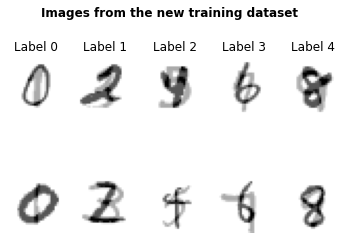

In [6]:
# create figure for training data
fig1, ax1 = plt.subplots(2,5)

# figure title
fig1.suptitle("Images from the new training dataset", fontweight="bold")

# plot the new images
for ii in range(5):
  ax1[0,ii].set_title(f"Label {ii}")

  for jj in range(2):
    ax1[jj,ii].imshow(train_images_NEW[np.random.choice(np.where(train_labels_NEW==ii)[0])], cmap=plt.cm.binary)
    ax1[jj,ii].axis("off")

plt.show()

Plot new testing data examples at random

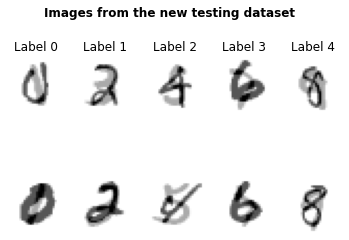

In [7]:
# create figure for testing data
fig2, ax2 = plt.subplots(2,5)

# figure title
fig2.suptitle("Images from the new testing dataset", fontweight="bold")

# plot the new images
for ii in range(5):
  ax2[0,ii].set_title(f"Label {ii}")

  for jj in range(2):
    ax2[jj,ii].imshow(test_images_NEW[np.random.choice(np.where(test_labels_NEW==ii)[0])], cmap=plt.cm.binary)
    ax2[jj,ii].axis("off")

plt.show()

## Task 3

**Design a neural network model to classify the 5 classes in the new dataset, and optimize it by tuning its hyper-parameters and trying our learned regualization techniques (such as L1 regularization, L2 regularization, dropout).**

**Your task: For your final (namely, optimized) neural network model, submit its code, and show the model's performance (including loss value and accuracy) for training, validation and testing. (For training performance and validation performance, illustrate them using figures, where the x-axis is the number of training epochs, and the y-axis is the loss or accuracy. For testing performance, just show the values of loss and accuracy.) Also, answer the questions: in this process of optimizing your model, did you observe underfitting? Did you observe overfitting? Did you try the reguliazation techniques? Did they help? (10 points)**

Prepare the new image data

In [8]:
# resize and normalize new image data
train_images_NEW = train_images_NEW.reshape((30000, 28 * 28))
train_images_NEW = train_images_NEW.astype("float32") / 255
test_images_NEW = test_images_NEW.reshape((5000, 28 * 28))
test_images_NEW = test_images_NEW.astype("float32") / 255

Network architecture

In [9]:
# sequential model
model = keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(5, activation="softmax")
])

# compilation
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# train the model and record the progress
history = model.fit(train_images_NEW, train_labels_NEW,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.4,
                    verbose=0)

Extract loss and accuracy for training and validation data

In [10]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

Plot training and validation loss

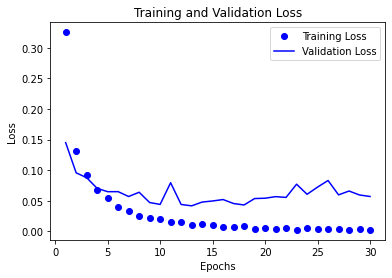

In [11]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax3.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax3.set_title("Training and Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
plt.show()

Plot training and validation accuracy

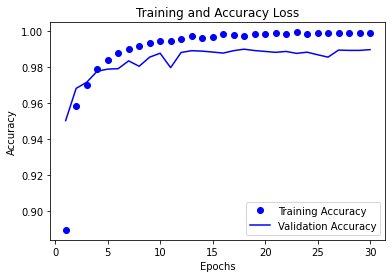

In [12]:
# create figure for training data
fig4, ax4 = plt.subplots()

# plot
ax4.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax4.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax4.set_title("Training and Accuracy Loss")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Accuracy")
ax4.legend()
plt.show()

Retrain the model from scratch

In [13]:
# index the epoch where the maximum accuracy was achieved
max_acc_idx = val_acc_values.index(max(val_acc_values))

# sequential model
model = keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(5, activation="softmax")
])

# compilation
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# train the model and record the progress
history = model.fit(train_images_NEW, train_labels_NEW,
                    epochs=max_acc_idx,
                    batch_size=128,
                    validation_split=0.4,
                    verbose=0)

Final results

In [14]:
# print final results
results = model.evaluate(test_images_NEW, test_labels_NEW)
print(f'Network loss:     {results[0]}')
print(f'Network accuracy: {results[1]}')

157/157 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9816
Network loss:     0.09355377405881882
Network accuracy: 0.9815999865531921


### Baseline Model
This is the first model that was fitted and evaluated. It consists of the following hyper-parameters:
- `dense(64, activation='relu')`
- `dense(64, activation='relu')`
- `optimizer=rmsprop`
- `loss=sparse_categorical_crossentropy`
- `metrics=[accuracy]`
- `batch_size=128`
- `validation_split=0.4`

After 8 epochs, this baseline model had the following results:
- Loss: `0.0679246038198471`
- Accuracy: `0.9807999730110168`

### Optimization Process

The baseline model already achieves a very high degree of accuracy after 8 epochs.